In [1]:
import numpy as np
from scipy.special import softmax

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Hard Attention

In [10]:
v1 = np.array([1,0])
v2 = np.array([0,1])
v3 = np.array([-.5,-.5])

X = np.array([v1, v2, v3])
X

array([[ 1. ,  0. ],
       [ 0. ,  1. ],
       [-0.5, -0.5]])

In [25]:
def plot_vectors(X, A=None):
    plt.figure(figsize=(4,4))
    ax = plt.axes()
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    
    for x in X:
        ax.arrow(0,0, x[0], x[1], head_width=.1, head_length=.1, color="blue")
    if A is not None:
        Y = np.dot(A, X)
        for y in Y:
            ax.arrow(0,0, y[0], y[1], head_width=.1, head_length=.1, color="red")
        print(Y)
    plt.show()

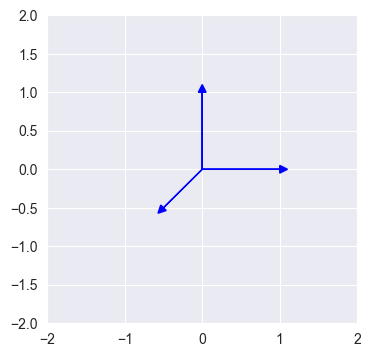

In [26]:
plot_vectors(X)

[[ 0.   0. ]
 [ 0.   0. ]
 [-0.5 -0.5]]


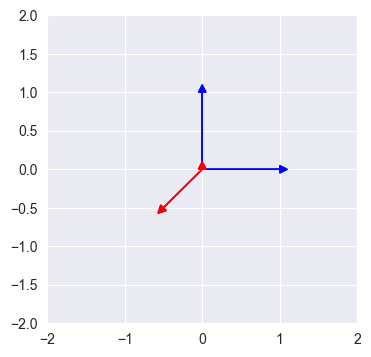

In [29]:
A = np.array([
    np.array([0,0,0]),
    np.array([0,0,0]),
    np.array([0,0,1]),
])

# np.dot(A,X)
plot_vectors(X, A)

# Soft Attention

[[ 0.75  0.05]
 [ 0.05  0.75]
 [-0.3  -0.3 ]]


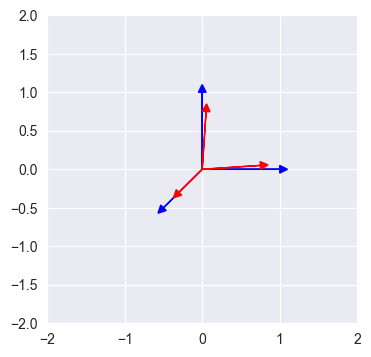

In [30]:
A = np.array([
    np.array([.8,.1,.1]),
    np.array([.1,.8,.1]),
    np.array([.1,.1,.8]),
])

plot_vectors(X, A)

# Self Attention

In [33]:
A = softmax(np.dot(X, X.T), 1)
A

array([[0.62853172, 0.2312239 , 0.14024438],
       [0.2312239 , 0.62853172, 0.14024438],
       [0.21194156, 0.21194156, 0.57611688]])

[[ 0.55840953  0.16110171]
 [ 0.16110171  0.55840953]
 [-0.07611688 -0.07611688]]


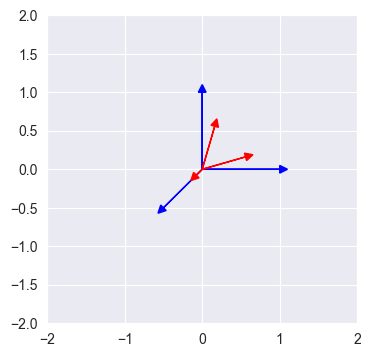

In [34]:
plot_vectors(X, A)

# General Attention

In [39]:
n_dim = 4

w1 = np.array([1,0,0,1])
w2 = np.array([0,1,0,1])
w3 = np.array([1,-1,0,0])

In [40]:
q1 = w1
q2 = w2
q3 = w3

k1 = w1
k2 = w2
k3 = w3

v1 = w1
v2 = w2
v3 = w3

In [41]:
Q = np.array([q1, q2, q3])
K = np.array([k1, k2, k3])
V = np.array([v1, v2, v3])

In [44]:
attention_weights = softmax(np.dot(Q, K.T) / np.sqrt(n_dim), 1)
attention_weights

array([[0.45186276, 0.27406862, 0.27406862],
       [0.33149896, 0.54654939, 0.12195165],
       [0.33149896, 0.12195165, 0.54654939]])

In [45]:
V

array([[ 1,  0,  0,  1],
       [ 0,  1,  0,  1],
       [ 1, -1,  0,  0]])

In [47]:
output = np.dot(attention_weights, V)
output

array([[ 0.72593138,  0.        ,  0.        ,  0.72593138],
       [ 0.45345061,  0.42459773,  0.        ,  0.87804835],
       [ 0.87804835, -0.42459773,  0.        ,  0.45345061]])

## General Attention with weights

In [52]:
n_dim = 4

w1 = np.array([1,0,0,1])
w2 = np.array([0,1,0,1])
w3 = np.array([1,-1,0,0])

In [53]:
np.random.seed(42)

Wq = np.random.randint(3, size=(4,4))
Wk = np.random.randint(3, size=(4,4))
Wv = np.random.randint(3, size=(4,4))

In [54]:
q1 = np.dot(w1, Wq)
q2 = np.dot(w2, Wq)
q3 = np.dot(w3, Wq)

k1 = np.dot(w1, Wk)
k2 = np.dot(w2, Wk)
k3 = np.dot(w3, Wk)

v1 = np.dot(w1, Wv)
v2 = np.dot(w2, Wv)
v3 = np.dot(w3, Wv)

In [57]:
Q = np.array([q1, q2, q3])
K = np.array([k1, k2, k3])
V = np.array([v1, v2, v3])

In [58]:
attention_weights = softmax(np.dot(Q, K.T) / np.sqrt(n_dim), 1)
attention_weights

array([[8.80761858e-01, 1.19198156e-01, 3.99865265e-05],
       [7.30255953e-01, 2.68646152e-01, 1.09789542e-03],
       [7.15268276e-01, 2.63132494e-01, 2.15992304e-02]])

In [59]:
output = np.dot(attention_weights, V)
output

array([[1.11911818, 3.11903821, 2.7615637 , 1.11911818],
       [1.26645036, 3.26425457, 2.4616098 , 1.26645036],
       [1.21993403, 3.17673557, 2.45213578, 1.21993403]])